#### Importing The required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the excel file

In [8]:
df = pd.read_excel('C:/Users/GGPC/Downloads/bank-marketing.xlsx')

In [51]:
df.head() # to see the first few rows

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

#### a. Average Balance for Successful Outcomes
What is the average balance for the customers for whom the outcome of the previous marketing campaign was successful?


In [54]:
df.groupby('poutcome').balance.mean()  # This is how aggregate functions are using in pandas

poutcome
failure    1465.805550
other      1487.411413
success    1939.301125
unknown    1318.722043
Name: balance, dtype: float64

In [47]:
df.loc[df['poutcome']=='success','balance'].mean() # best code

1939.3011250827267

#####    1939.301125


#### b.Single Customers with Personal Loan
What is the average duration for single people who have a personal loan?

In [70]:
df.loc[(df['marital'] == 'single')  & (df['loan'] == 'yes'),'duration'].mean() #using selection (loc method)

266.2423331328924

#### 266.2423331328924

#### c. Spread of Duration
Suppose you want to know how the duration of a loan application is spread over a period of one year. Which of the following visualisation methods can be used for this purpose?

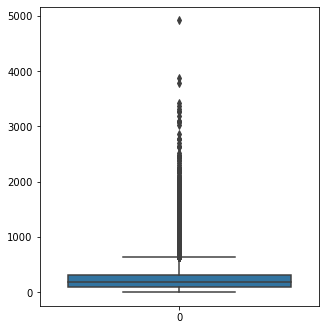

In [148]:
plt.figure(figsize=[5,5.5])
sns.boxplot(data = df['duration'])
plt.show()

#### d. Last Contacted in May
Report the average salary of the customers who were last contacted in the month of May and select the correct option from below.

In [118]:
df.loc[df['month'] == 'may','salary'].mean()

52486.70637803283

#### 52486.70637803283

In [119]:
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,dummy_loan
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,0
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,0
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


#### e. Percentage Difference in July Salary
What is the percentage difference in the average salary for the month of July? (By default, the percentage difference calculation is done between the previous month and the current month).

In [130]:
df.groupby('month').salary.mean()

month
apr    54339.358799
aug    64886.345446
dec    58892.523364
feb    56031.710079
jan    57086.956522
jul    57994.343727
jun    53656.431380
mar    60264.150943
may    52486.706378
nov    64469.773300
oct    58287.262873
sep    60146.804836
Name: salary, dtype: float64

#### Here is the generally used formula to calculate the percent change:

(new_value - old_value)*100 / old_value

In [142]:
average_salary_july = df.groupby('month').salary.mean()[5]
average_salary_june = df.groupby('month').salary.mean()[6]
percent_change = (average_salary_july - average_salary_june)*100/average_salary_june
percent_change

8.084608379440128

#### 8.0846